In [2]:
import json
import pandas as pd
from bs4 import BeautifulSoup
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=[]
with open('arxiv-metadata-oai-2019.json','r') as f:
    for line in f:
        data.append(json.loads(line))
data=pd.DataFrame(data)

In [4]:
data.head(1)

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0297,Sung-Chul Yoon,"Sung-Chul Yoon, Philipp Podsiadlowski and Step...",Remnant evolution after a carbon-oxygen white ...,"15 pages, 15 figures, 3 tables, submitted to M...",None,10.1111/j.1365-2966.2007.12161.x,None,astro-ph,None,We systematically explore the evolution of t...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...",2019-08-19,"[[Yoon, Sung-Chul, ], [Podsiadlowski, Philipp,..."


In [5]:
data['categories'].describe()
data1=data

In [6]:
list=[]
for x in data['categories']:
    for l in x.split(' '):
            list.append(l)
len(set(list))

172

In [7]:
print(set(list))

{'cs.DC', 'hep-ex', 'math.AG', 'q-bio.MN', 'physics.data-an', 'cs.DM', 'cs.PL', 'physics.ins-det', 'nucl-th', 'math.GM', 'math.MG', 'math.FA', 'math.IT', 'stat.AP', 'cs.CY', 'cs.OS', 'cs.SD', 'physics.pop-ph', 'math.CA', 'mtrl-th', 'math.ST', 'q-fin.PM', 'math-ph', 'astro-ph.GA', 'cond-mat.other', 'cs.DS', 'cs.OH', 'cond-mat.quant-gas', 'physics.atm-clus', 'econ.EM', 'chem-ph', 'math.SG', 'cs.LO', 'math.PR', 'solv-int', 'physics.ao-ph', 'physics.gen-ph', 'physics.plasm-ph', 'physics.soc-ph', 'cs.LG', 'cs.CV', 'physics.app-ph', 'q-bio.PE', 'physics.geo-ph', 'stat.ME', 'q-fin.GN', 'dg-ga', 'supr-con', 'math.MP', 'math.NA', 'alg-geom', 'cs.IR', 'math.GR', 'physics.comp-ph', 'cs.IT', 'gr-qc', 'cond-mat.soft', 'eess.AS', 'cs.NA', 'econ.TH', 'physics.atom-ph', 'q-bio.CB', 'q-bio.BM', 'physics.flu-dyn', 'cs.CG', 'cmp-lg', 'math.GT', 'cs.AR', 'q-alg', 'eess.SY', 'cs.CC', 'nlin.AO', 'astro-ph.CO', 'astro-ph', 'astro-ph.EP', 'cs.DL', 'physics.med-ph', 'math.HO', 'patt-sol', 'cs.ET', 'math.SP', '

In [8]:
data['year']=pd.to_datetime(data['update_date']).dt.year
del data['update_date']
data=data[data['year']>=2019]
data.reset_index(drop=True,inplace=True)
data

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,authors_parsed,year
0,0704.0297,Sung-Chul Yoon,"Sung-Chul Yoon, Philipp Podsiadlowski and Step...",Remnant evolution after a carbon-oxygen white ...,"15 pages, 15 figures, 3 tables, submitted to M...",None,10.1111/j.1365-2966.2007.12161.x,None,astro-ph,None,We systematically explore the evolution of t...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...","[[Yoon, Sung-Chul, ], [Podsiadlowski, Philipp,...",2019
1,0704.0342,Patrice Ntumba Pungu,B. Dugmore and PP. Ntumba,Cofibrations in the Category of Frolicher Spac...,27 pages,None,None,None,math.AT,None,Cofibrations are defined in the category of ...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...","[[Dugmore, B., ], [Ntumba, PP., ]]",2019
2,0704.0360,Zaqarashvili,T.V. Zaqarashvili and K Murawski,Torsional oscillations of longitudinally inhom...,"6 pages, 3 figures, accepted in A&A",None,10.1051/0004-6361:20077246,None,astro-ph,None,We explore the effect of an inhomogeneous ma...,"[{'version': 'v1', 'created': 'Tue, 3 Apr 2007...","[[Zaqarashvili, T. V., ], [Murawski, K, ]]",2019
3,0704.0525,"Sezgin Ayg\""un","Sezgin Aygun, Ismail Tarhan, Husnu Baysal",On the Energy-Momentum Problem in Static Einst...,This submission has been withdrawn by arXiv ad...,"Chin.Phys.Lett.24:355-358,2007",10.1088/0256-307X/24/2/015,None,gr-qc,None,This paper has been removed by arXiv adminis...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...","[[Aygun, Sezgin, ], [Tarhan, Ismail, ], [Baysa...",2019
4,0704.0535,Antonio Pipino,"Antonio Pipino (1,3), Thomas H. Puzia (2,4), a...",The Formation of Globular Cluster Systems in M...,"32 pages (referee format), 9 figures, ApJ acce...","Astrophys.J.665:295-305,2007",10.1086/519546,None,astro-ph,None,The most massive elliptical galaxies show a ...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...","[[Pipino, Antonio, ], [Puzia, Thomas H., ], [M...",2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170613,quant-ph/9904032,Mikhail Lukin,"V. A. Sautenkov, M. D. Lukin, C. J. Bednar, G....",Enhancement of Magneto-Optic Effects via Large...,None,None,10.1103/PhysRevA.62.023810,None,quant-ph,None,We utilize the generation of large atomic co...,"[{'version': 'v1', 'created': 'Thu, 8 Apr 1999...","[[Sautenkov, V. A., ], [Lukin, M. D., ], [Bedn...",2019
170614,solv-int/9511005,Wen-Xiu Ma,"Wen-Xiu Ma, Benno Fuchssteiner",Explicit and Exact Solutions to a Kolmogorov-P...,"14pages, Latex, to appear in Intern. J. Nonlin...",None,10.1016/0020-7462(95)00064-X,None,solv-int nlin.SI,None,Some explicit traveling wave solutions to a ...,"[{'version': 'v1', 'created': 'Tue, 14 Nov 199...","[[Ma, Wen-Xiu, ], [Fuchssteiner, Benno, ]]",2019
170615,solv-int/9809008,Victor Enolskii,"J C Eilbeck, V Z Enol'skii, V B Kuznetsov, D V...",Linear r-Matrix Algebra for a Hierarchy of One...,"plain LaTeX, 28 pages",None,None,None,solv-int nlin.SI,None,We consider a hierarchy of many-particle sys...,"[{'version': 'v1', 'created': 'Wed, 2 Sep 1998...","[[Eilbeck, J C, ], [Enol'skii, V Z, ], [Kuznet...",2019
170616,solv-int/9909010,Pierre van Moerbeke,"M. Adler, T. Shiota and P. van Moerbeke",Pfaff tau-functions,42 pages,None,None,None,solv-int adap-org hep-th nlin.AO nlin.SI,None,Consider the evolution $$ \frac{\pl m_\iy}{\...,"[{'version': 'v1', 'created': 'Wed, 15 Sep 199...","[[Adler, M., ], [Shiota, T., ], [van Moerbeke,...",2019


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170618 entries, 0 to 170617
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              170618 non-null  object
 1   submitter       170501 non-null  object
 2   authors         170618 non-null  object
 3   title           170618 non-null  object
 4   comments        118104 non-null  object
 5   journal-ref     51400 non-null   object
 6   doi             70478 non-null   object
 7   report-no       6428 non-null    object
 8   categories      170618 non-null  object
 9   license         167606 non-null  object
 10  abstract        170618 non-null  object
 11  versions        170618 non-null  object
 12  authors_parsed  170618 non-null  object
 13  year            170618 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 18.2+ MB


In [10]:
import requests
website_url=requests.get('https://arxiv.org/category_taxonomy').text
soup=BeautifulSoup(website_url,'lxml')
root=soup.find('div',{'id':'category_taxonomy_list'})
tags=root.find_all(["h2","h3","h4","p"],recursive=True)

In [11]:
level_1_name=''
level_2_name=''
level_3_name=''
level_2_code=''
level_3_code=''
level_1_names=[]
level_2_codes=[]
level_2_names=[]
level_3_notes=[]
level_3_names=[]
level_3_codes=[]

In [12]:
for t in tags:
    if t.name=='h2':
        level_1_name=t.text
        level_2_code=t.text
        level_2_name=t.text
    elif t.name=='h3':
        raw=t.text
        level_2_code=re.sub(r"(.*)\((.*)\)",r"\2",raw)
        level_2_name=re.sub(r"(.*)\((.*)\)",r"\1",raw)
    elif t.name=='h4':
        raw=t.text
        level_3_code=re.sub(r"(.*) \((.*)\)",r"\1",raw)
        level_3_name=re.sub(r"(.*) \((.*)\)",r"\2",raw)
    elif t.name=='p':
        notes=t.text
        level_1_names.append(level_1_name)
        level_2_names.append(level_2_name)
        level_2_codes.append(level_2_code)
        level_3_notes.append(notes)
        level_3_names.append(level_3_name)
        level_3_codes.append(level_3_code)

In [13]:
df_taxonomy=pd.DataFrame({'group_name':level_1_names,'archive_name':level_2_names,'archive_id':level_2_codes,'category_name':level_3_names,'categories':level_3_codes,'category_description':level_3_notes})
df_taxonomy.groupby(['group_name','archive_name'])
df_taxonomy.head()

,group_name,archive_name,archive_id,category_name,categories,category_description
0,Computer Science,Computer Science,Computer Science,Artificial Intelligence,cs.AI,"Covers all areas of AI except Vision, Robotics..."
1,Computer Science,Computer Science,Computer Science,Hardware Architecture,cs.AR,Covers systems organization and hardware archi...
2,Computer Science,Computer Science,Computer Science,Computational Complexity,cs.CC,"Covers models of computation, complexity class..."
3,Computer Science,Computer Science,Computer Science,"Computational Engineering, Finance, and Science",cs.CE,Covers applications of computer science to the...
4,Computer Science,Computer Science,Computer Science,Computational Geometry,cs.CG,Roughly includes material in ACM Subject Class...


In [17]:
df = data.merge(df_taxonomy, on="categories", how="left") .drop_duplicates(["id", "group_name"]).groupby("group_name") .agg({"id":"count"}).sort_values(by="id" ,ascending=False) .reset_index()

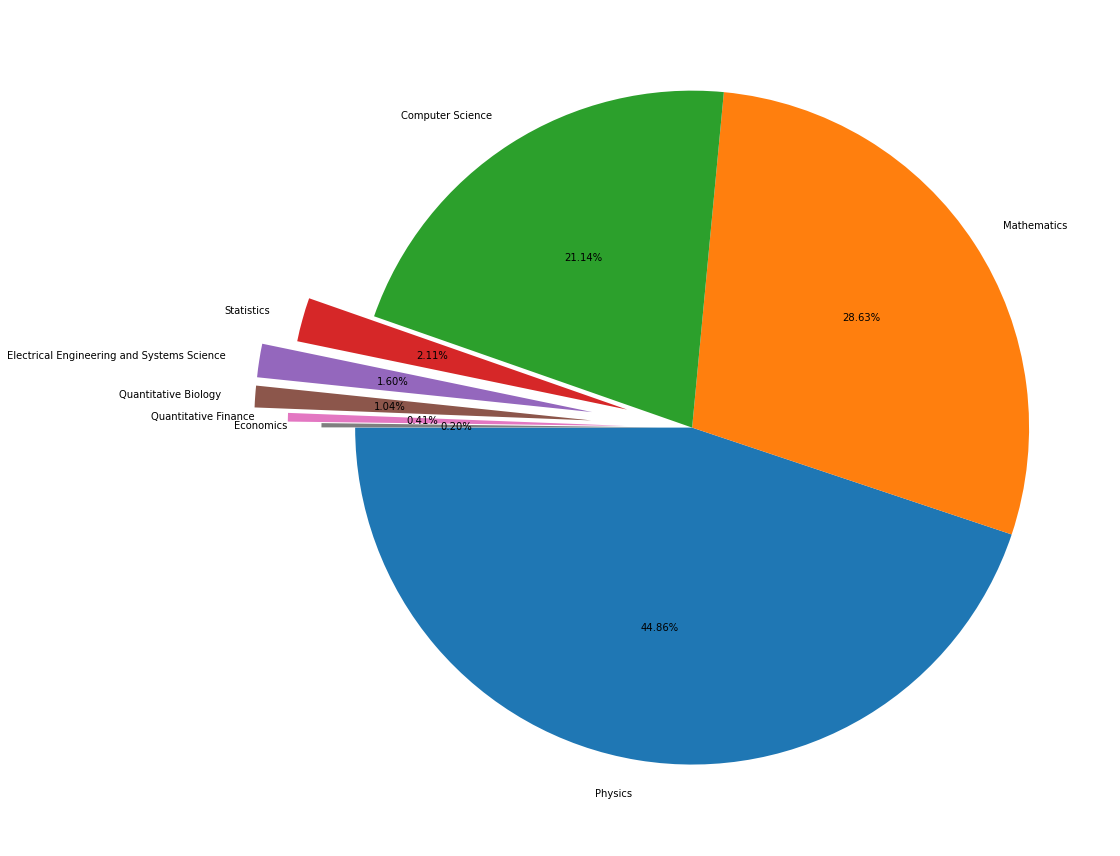

In [18]:
fig=plt.figure(figsize=(15,12))
explode=(0,0,0,0.2,0.3,0.3,0.2,0.1)
plt.pie(df['id'],labels=df['group_name'],autopct='%1.2f%%',startangle=180,explode=explode)
plt.tight_layout()
#plt.savefig('pie.png',dpi=200,facecolor='White')
plt.show()

In [ ]:
group_name='Computer Science'
cats=data1.merge(df_taxonomy,on='categories').query("group_name==@group_name")
cats.groupby(['year','category_name']).count().reset_index().pivot(index='category_name',columns='year',values='id')

year,2019
category_name,
Artificial Intelligence,558
Computation and Language,2153
Computational Complexity,131
"Computational Engineering, Finance, and Science",108
Computational Geometry,199
Computer Science and Game Theory,281
Computer Vision and Pattern Recognition,5559
Computers and Society,346
Cryptography and Security,1067
